In [1]:
# Import packages
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')

# Import differentiation matrices
from diff import *

### Test Finite-Difference Method

In [2]:
def compute_error(N, diff_mat):
    # Grid
    x=np.linspace(0,2.*np.pi,N+1,endpoint=True)
    h=(x[-1]-x[0])/N
    # Test functions
    u = np.sin(x)
    du= np.cos(x)
    ddu=-np.sin(x)
    # Numerical derivative
    D1,D2=diff_mat(N+1, h, periodic=False)
    err1=D1.dot(u)-du
    err2=D2.dot(u)-ddu
    return np.linalg.norm(err1), np.linalg.norm(err2)

In [4]:
N=10
iterations = 8
err1_o2=[]; err2_o2=[]
err1_o4=[]; err2_o4=[]
err1_o6=[]; err2_o6=[]
cells=[]
for i in range(iterations):
    cells.append(N)
    err1, err2 = compute_error(N,fd_o2)
    err1_o2.append(err1); err2_o2.append(err2)
    err1, err2 = compute_error(N,fd_o4)
    err1_o4.append(err1); err2_o4.append(err2)
    err1, err2 = compute_error(N,fd_o6)
    err1_o6.append(err1); err2_o6.append(err2)
    N*=2

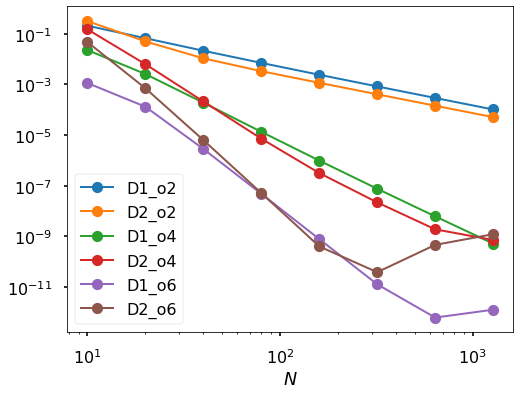

In [5]:
plt.figure(figsize = (8, 6))
plt.xlabel("$N$")
plt.loglog(cells, err1_o2, 'o-', lw=2, label='D1_o2')
plt.loglog(cells, err2_o2, 'o-', lw=2, label='D2_o2')
plt.loglog(cells, err1_o4, 'o-', lw=2, label='D1_o4')
plt.loglog(cells, err2_o4, 'o-', lw=2, label='D2_o4')
plt.loglog(cells, err1_o6, 'o-', lw=2, label='D1_o6')
plt.loglog(cells, err2_o6, 'o-', lw=2, label='D2_o6')
plt.legend(loc='lower left')

### Test Chebyshev-Collocation Method

In [6]:
def compute_cc_error(N, r0, r1):
    # Matrices and grid
    D1,D2,x=cheb(N, r0, r1)
    # Test functions
    u = np.sin(x)
    du= np.cos(x)
    ddu=-np.sin(x)
    # Numerical derivative
    err1=D1.dot(u)-du
    err2=D2.dot(u)-ddu
    return np.linalg.norm(err1), np.linalg.norm(err2)

In [7]:
N=4
iterations = 12
err1_cc = []; err2_cc = []
cells=[]
for i in range(iterations):
    cells.append(N)
    err1, err2 = compute_cc_error(N, 0, 2.*np.pi)
    err1_cc.append(err1); err2_cc.append(err2)
    N+=2

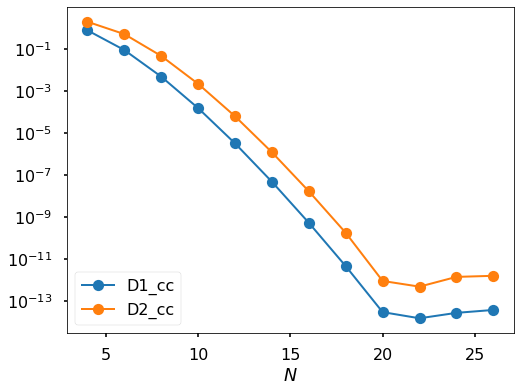

In [8]:
plt.figure(figsize = (8, 6))
plt.xlabel("$N$")
plt.semilogy(cells, err1_cc, 'o-', lw=2, label='D1_cc')
plt.semilogy(cells, err2_cc, 'o-', lw=2, label='D2_cc')
plt.legend(loc='lower left')

### Test Spectral-Galerkin Method (requires shenfun)

In [9]:
from shenfun import *

In [28]:
def compute_sg_error(N, r0, r1):
    T = FunctionSpace(N, 'Chebyshev', domain=(r0,r1), bc=None)
    xj=T.mesh()
    # Test functions
    u = np.sin(xj) # Alternatively with sympy: u_sg = Function(T, buffer=sympy.sin(x))
    du= np.cos(xj)
    ddu = -np.sin(xj)
    # Shenfun derivatives
    u_sg = Function(T)
    u_sg = T.forward(u, u_sg)
    du_sg=Dx(u_sg,0,1) # shenfun doesn't derive arrays but functions
    ddu_sg=Dx(u_sg,0,2)
    # Evaluate before computing error
    err1=du - du_sg.eval(xj)
    err2=ddu - ddu_sg.eval(xj)
    return np.linalg.norm(err1), np.linalg.norm(err2)

# For this example, the appropriate function space would have been
# T = FunctionSpace(N, 'Fourier', domain=(r0,r1), dtype='D')
# We don't use it intentionally, to test the convergence of Chebyshev differentiation

In [29]:
N=4
iterations = 12
err1_sg = []; err2_sg = []
cells=[]
for i in range(iterations):
    cells.append(N)
    err1, err2 = compute_sg_error(N, 0, 2.*np.pi)
    err1_sg.append(err1); err2_sg.append(err2)
    N+=2

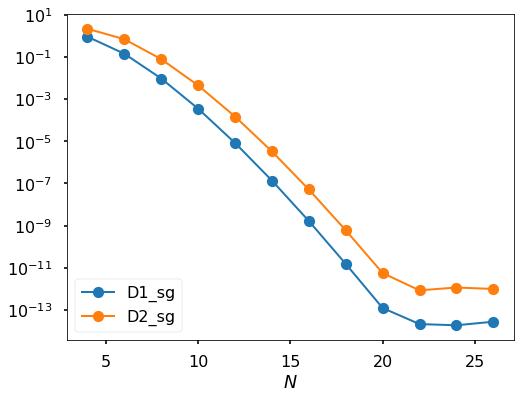

In [30]:
plt.figure(figsize = (8, 6))
plt.xlabel("$N$")
plt.semilogy(cells, err1_sg, 'o-', lw=2, label='D1_sg')
plt.semilogy(cells, err2_sg, 'o-', lw=2, label='D2_sg')
plt.legend(loc='lower left')